#### Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


#### Load and Preprocess the Dataset

In [2]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the images to a range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0


#### Define the Model Architecture

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


#### Compile the Model

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#### Train the Model

In [5]:
# Reshape the data to include the channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 67s 35ms/step - loss: 0.5014 - accuracy: 0.8146 - val_loss: 0.3561 - val_accuracy: 0.8687
Epoch 2/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.3199 - accuracy: 0.8838 - val_loss: 0.3151 - val_accuracy: 0.8854
Epoch 3/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2738 - accuracy: 0.8992 - val_loss: 0.3146 - val_accuracy: 0.8865
Epoch 4/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2433 - accuracy: 0.9098 - val_loss: 0.3004 - val_accuracy: 0.8912
Epoch 5/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2217 - accuracy: 0.9179 - val_loss: 0.2733 - val_accuracy: 0.9049
Epoch 6/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2005 - accuracy: 0.9255 - val_loss: 0.2710 - val_accuracy: 0.9061
Epoch 7/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1828 - accuracy: 0.9315 - val_loss: 0.2639 -

#### Evaluate the Model

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')


313/313 - 3s - loss: 0.2780 - accuracy: 0.9108 - 3s/epoch - 11ms/step

Test accuracy: 0.91


#### Visualize Training History

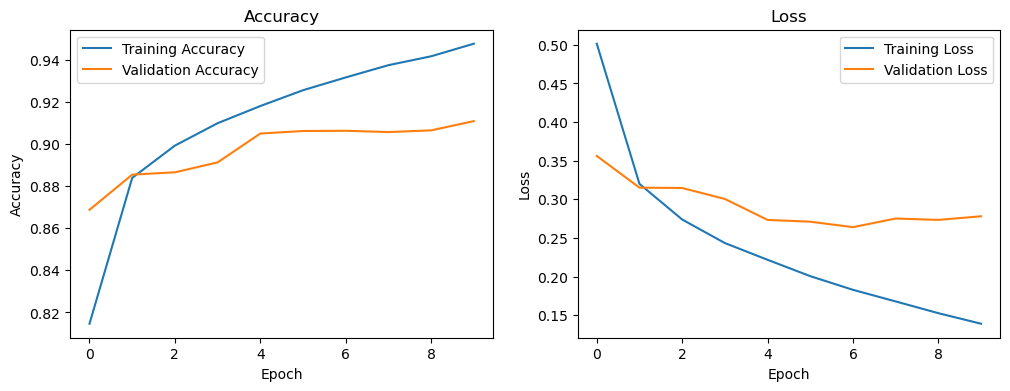

In [7]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


#### Make Predictions

In [9]:
import numpy as np

313/313 [==============================] - 4s 12ms/step


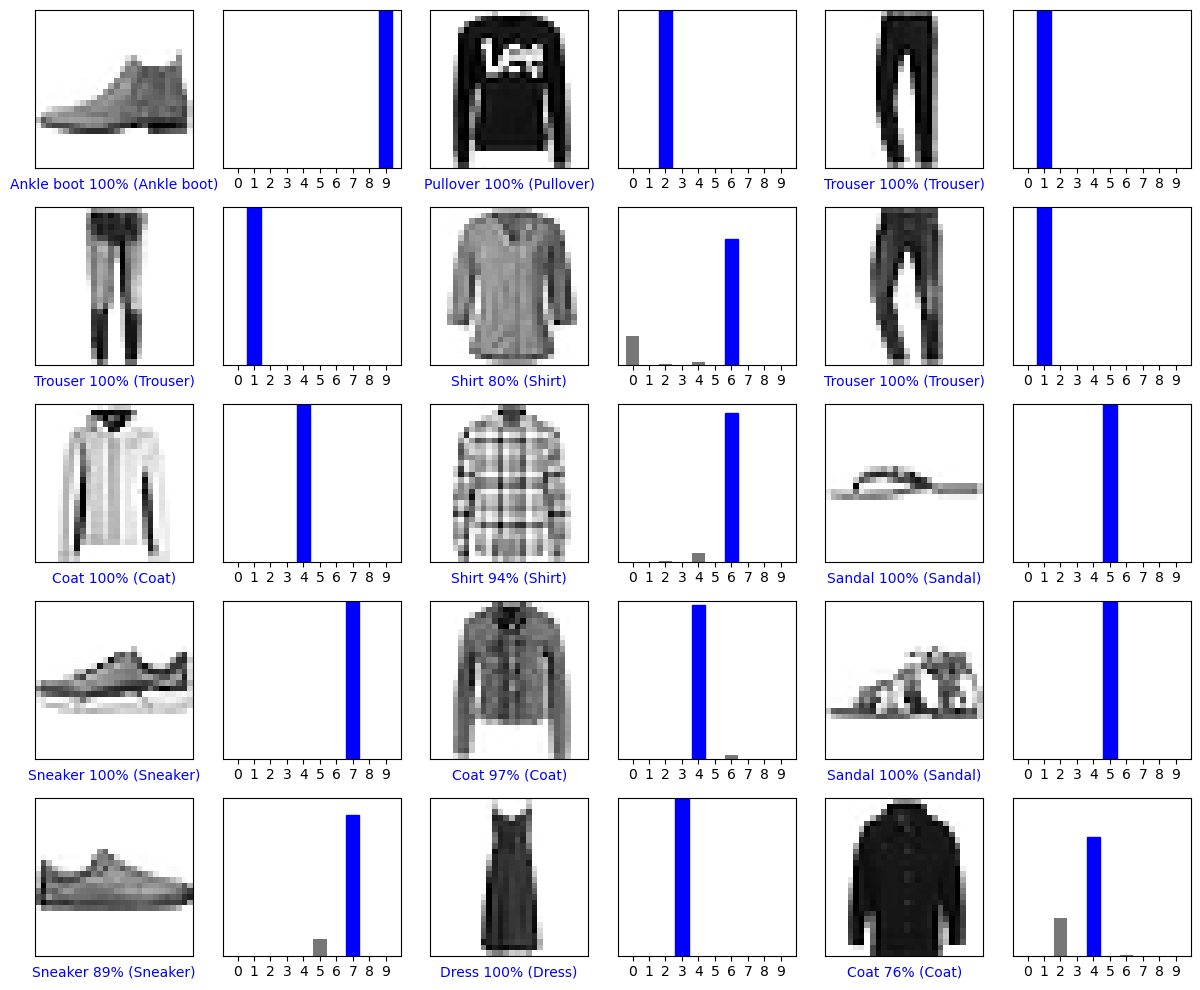

In [10]:
predictions = model.predict(test_images)

# Define a function to plot the images and predictions
def plot_image(predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

def plot_value_array(predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the first 15 test images, their predicted labels, and the true labels
# Color correct predictions in blue and incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(predictions[i], test_labels[i], test_images[i].reshape(28, 28))
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(predictions[i], test_labels[i])
plt.tight_layout()
plt.show()
